In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import missingno as msno
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

## Read the Dataset

In [2]:
df = pd.read_csv("C:\\Users\\sreel\\Downloads\\advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Exploratory Analysis 

## Checking the details of Rows Columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Checking the Null Values

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Univariate Analysis

Text(0, 0.5, 'Count')

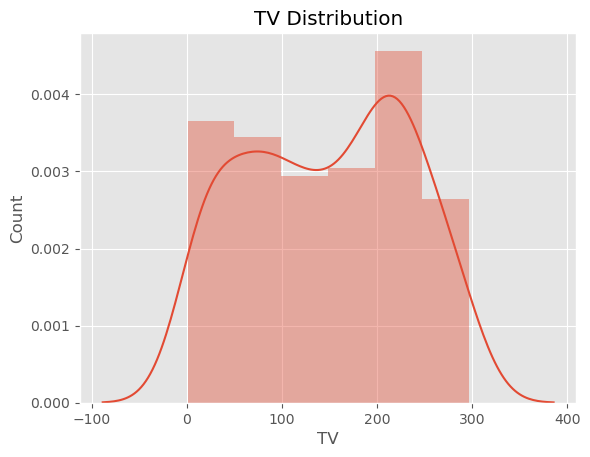

In [8]:
sns.distplot(df['TV'])
plt.title('TV Distribution')
plt.xlabel('TV')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

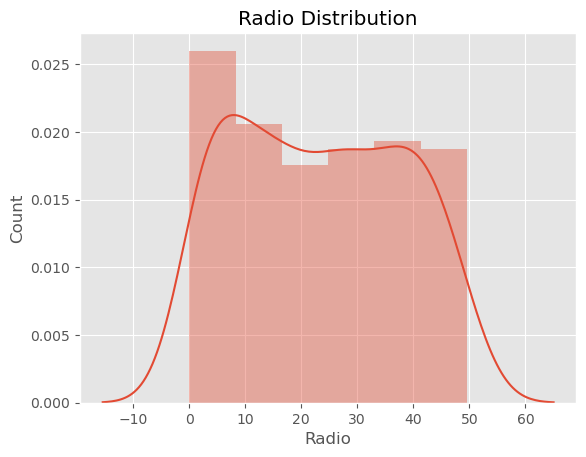

In [9]:
sns.distplot(df['Radio'])
plt.title('Radio Distribution')
plt.xlabel('Radio')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

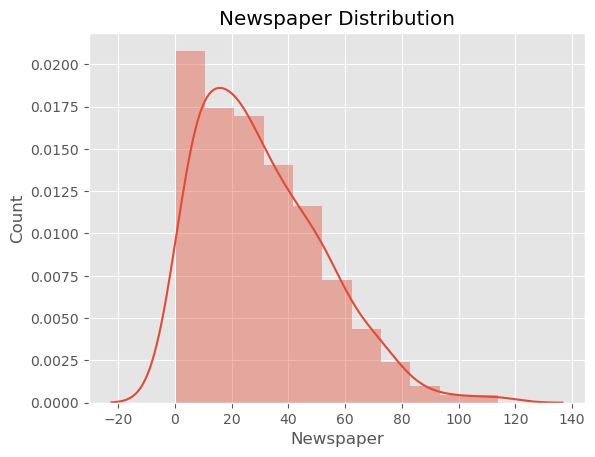

In [10]:
sns.distplot(df['Newspaper'])
plt.title('Newspaper Distribution')
plt.xlabel('Newspaper')
plt.ylabel('Count')

<Axes: xlabel='TV'>

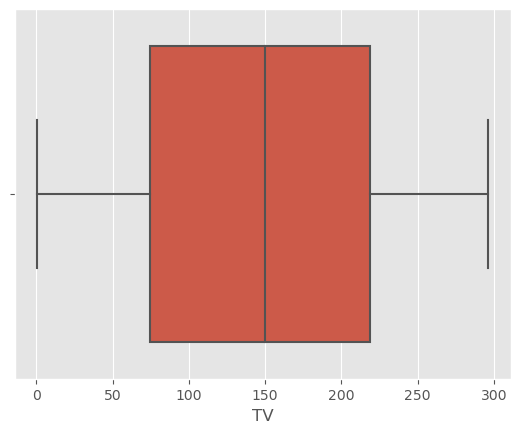

In [11]:
sns.boxplot(x = 'TV', data = df)

<Axes: xlabel='Radio'>

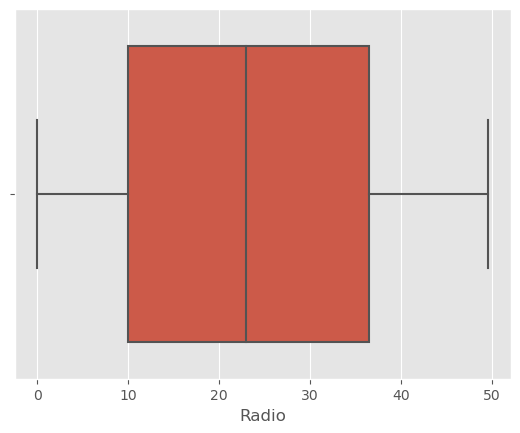

In [12]:
sns.boxplot(x = 'Radio', data = df)

<Axes: xlabel='Newspaper'>

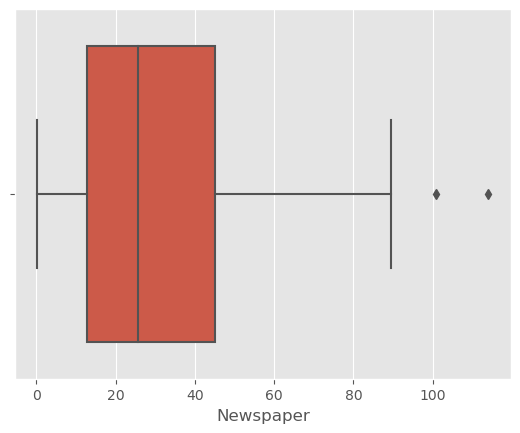

In [13]:
sns.boxplot(x = 'Newspaper', data = df)

## Bivariate Analysis

<Axes: >

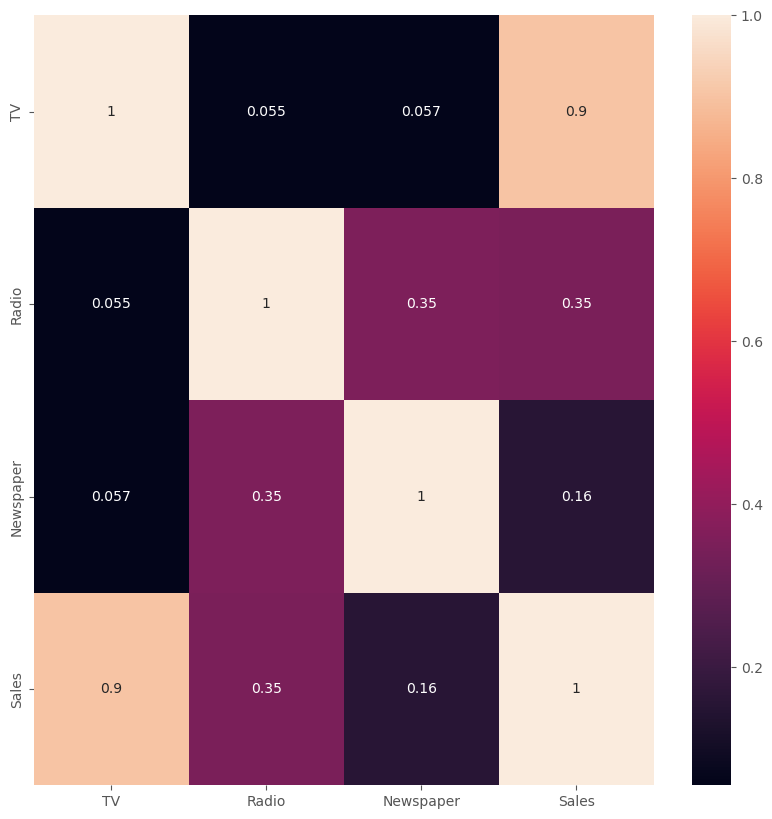

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

## Preprocessing

## Handling Outliers

In [15]:
df.quantile([0,0.05,0.50,0.95,0.99,1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
TV,0.7,13.195,149.75,280.735,292.907,296.4
Radio,0.0,1.995,22.90,46.810,49.400,49.6
Newspaper,0.3,3.600,25.75,71.825,89.515,114.0
Sales,1.6,6.600,16.00,23.800,25.507,27.0


In [16]:
def outlier_thresholds(df, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

def check_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis = None):
        return True
    else:
        return False

In [17]:
for col in df.select_dtypes(include=[float, int]):
    print(f"{col}: {check_outliers(df, col)}")

TV: False
Radio: False
Newspaper: True
Sales: False


In [18]:
def grab_outliers(df, col_name, index = False):
    low, up = outlier_thresholds(df, col_name)
    if df[((df[col_name] < low) | (df[col_name] > up))].shape[0] > 10:
        print(df[((df[col_name] < low) |(df[col_name] > up))].head())
    else:
        print(df[((df[col_name] < low) | (df[col_name] > up))])
    if index:
        outlier_index = df[((df[col_name] < low) | (df[col_name] > up))].index
        return outlier_index

In [19]:
for col in df.select_dtypes(include=[float, int]):
    col, grab_outliers(df, col)

Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


In [20]:
def replace_with_thresholds(df, variable):
    low_limit, up_limit = outlier_thresholds(df, variable)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit

In [21]:
for col in df.select_dtypes(include=[float, int]):
    replace_with_thresholds(df,col)

In [22]:
#Checking Outliers Again
for col in df.select_dtypes(include=[float, int]):
    print(f"{col}: {check_outliers(df,col)}")

TV: False
Radio: False
Newspaper: False
Sales: False


In [23]:
df.quantile([0,0.05,0.50,0.95,0.99,1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
TV,0.7,13.195,149.75,280.735,292.90700,296.400
Radio,0.0,1.995,22.90,46.810,49.40000,49.600
Newspaper,0.3,3.600,25.75,71.825,89.44225,93.625
Sales,1.6,6.600,16.00,23.800,25.50700,27.000


## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[["TV","Radio"]]=scaler.fit_transform(df[["TV","Radio"]])

## Train- Test Split

In [25]:
X = df.drop(['Sales'], axis = 1)
y = df['Sales']

In [26]:
X.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,69.2
1,-1.197376,1.082808,45.1
2,-1.516155,1.528463,69.3
3,0.052050,1.217855,58.5
4,0.394182,-0.841614,58.4


In [27]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building and Evaluating the Model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import matplotlib as plt
import scikitplot as skplt

In [30]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training R2 Score:", train_r2)
print("Test R2 Score:", test_r2)

Training MSE: 2.67567416434839
Test MSE: 2.910741428271249
Training R2 Score: 0.900159081943189
Test R2 Score: 0.9058046015102618
